# Setup

In [2]:
# # This chunk works.
# !pip uninstall --yes gdown # After running this line, restart Colab runtime.

# !pip install gdown -U --no-cache-dir
import gdown

url = ' https://drive.google.com/drive/folders/1RvblHYInK63R1_-yo4kbxd6NnggNtr01?usp=drive_link'

gdown.download_folder(url)
!gdown 1SJL9Rb-gMixa8qIdrIyr5Oh56Vssr3DH

Retrieving folder list


Processing file 1SJL9Rb-gMixa8qIdrIyr5Oh56Vssr3DH Group 4.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1SJL9Rb-gMixa8qIdrIyr5Oh56Vssr3DH
To: /content/Vinternship2023/Group 4.xlsx
100%|██████████| 233k/233k [00:00<00:00, 64.5MB/s]
Download completed


Downloading...
From: https://drive.google.com/uc?id=1SJL9Rb-gMixa8qIdrIyr5Oh56Vssr3DH
To: /content/Group 4.xlsx
100% 233k/233k [00:00<00:00, 125MB/s]


# Loading the dataset

In [3]:
import pandas as pd
df=pd.read_excel("/content/Group 4.xlsx")
df.head()

,temperature;exhaust_vacuum;ambient_pressure;relative_humidity;energy_output
0,9.59;38.56;1017.01;60.1;481.3
1,12.04;42.34;1019.72;94.67;465.36
2,13.87;45.08;1024.42;81.69;465.48
3,13.72;54.3;1017.89;79.08;467.05
4,15.14;49.64;1023.78;75;463.58


In [4]:
print(df.shape)
data=df.iloc[:]
values=data["temperature;exhaust_vacuum;ambient_pressure;relative_humidity;energy_output"]
values.shape

(9568, 1)


(9568,)

# Take-away

We find 4 input features and 1 target output

In [5]:
import numpy as np

all_x=np.zeros((9568,4))
all_y=np.zeros((9568,1))

In [6]:
row=0
for value in values:
  
  string=value.split(";")
  all_x[row][0]=string[0]
  all_x[row][1]=string[1]
  all_x[row][2]=string[2]
  all_x[row][3]=string[3]
  all_y[row][0]=string[4]
  row+=1
print("feature inputs", all_x)

feature inputs [[   9.59   38.56 1017.01   60.1 ]
 [  12.04   42.34 1019.72   94.67]
 [  13.87   45.08 1024.42   81.69]
 ...
 [  30.44   56.24 1005.19   56.24]
 [  23.     66.05 1020.61   80.29]
 [  17.75   49.25 1020.86   63.67]]


In [7]:
print("target outputs", all_y)

target outputs [[481.3 ]
 [465.36]
 [465.48]
 ...
 [429.34]
 [421.57]
 [454.41]]


# Model imports and train-test split

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.1, random_state=42)


# Running a linear regression model

In [10]:
def linear_regression(X_train, X_test, y_train, y_test, input):
  # Create a linear regression model
  model1 = LinearRegression()
  # Train the model
  model1.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model1.predict(X_test)

  # # plotting
  # plt.scatter(X_train[0:,1], y_train, color = 'g')
  # plt.plot(X_test[0:,1], y_pred, color = 'r')
  
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (linear regression):", mse)
  
  prediction = model1.predict(input.reshape(1,-1))
  print("Predicting for the new input:", prediction)
  # print("Actual output for the second set of values:", all_y[1])

  return mse, prediction

# Running decision tree and random forest regression models

In [11]:
def decision_tree_regression(X_train, X_test, y_train, y_test, input):
  
  # Create a linear regression model
  model2 = DecisionTreeRegressor(random_state = 1)
  # Train the model
  model2.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model2.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (decision tree regression):", mse)

  prediction = model2.predict(input.reshape(1,-1))
  print("Predicting for the new input:", prediction)

  return mse, prediction

In [12]:
def random_forest_regression(X_train, X_test, y_train, y_test, input):
  
  # Create a linear regression model
  model3 = RandomForestRegressor()
  # Train the model
  model3.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model3.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)
  print("Mean Squared Error (random forest regression):", mse)

  prediction = model3.predict(input.reshape(1,-1))
  print("Predicting for the new input:", prediction)

  return mse, prediction

# Running a gradient boost regression model

In [13]:
from xgboost import XGBRegressor

def xgboost_regression(X_train, X_test, y_train, y_test, input):
  
  # Define the model
  model4 = XGBRegressor(n_estimators=2000, learning_rate=0.0405)

  # Fit the model
  model4.fit(X_train, y_train) # Your code here

  y_pred_XGB = model4.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred_XGB)
  print("Mean Squared Error (gradient boost):", mse)
  
  prediction = model4.predict(input.reshape(1,-1))
  print("Predicting for the new input:", prediction)

  return mse, prediction

# Error comparison and prediction task

In [35]:
input = np.array([19.0, 54.0, 1013.0, 73.0])

In [36]:
error_linear, prediction_linear = linear_regression(X_train, X_test, y_train, y_test, input)

Mean Squared Error (linear regression): 21.138205780598557
Predicting for the new input: [[455.75179545]]


In [37]:
error_decision, prediction_decision = decision_tree_regression(X_train, X_test, y_train, y_test, input)

Mean Squared Error (decision tree regression): 19.079019540229872
Predicting for the new input: [457.5]


In [38]:
error_forest, prediction_forest = random_forest_regression(X_train, X_test, y_train, y_test, input)

<ipython-input-12-f3d292ede06d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)


Mean Squared Error (random forest regression): 11.146932395527772
Predicting for the new input: [456.1576]


In [39]:
error_gradient , prediction_xgboost = xgboost_regression(X_train, X_test, y_train, y_test, input)

Mean Squared Error (gradient boost): 8.711346965173714
Predicting for the new input: [454.89572]


In [40]:
errors = np.array([error_linear, error_decision, error_forest, error_gradient])
models = ['linear', 'decision tree', 'random forest', 'gradient boost']
data = {'error': errors, 'model': models}
df = pd.DataFrame(data, columns = ['error', 'model'])
df

,error,model
0,21.138206,linear
1,19.079020,decision tree
2,11.146932,random forest
3,8.711347,gradient boost


<Axes: xlabel='model', ylabel='error'>

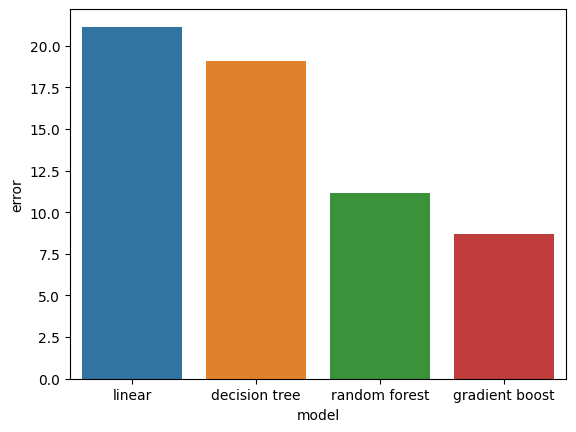

In [41]:
sns.barplot(data=df, x="model", y="error")

# Optimization task

In [ ]:
import numpy as np
from scipy.optimize import minimize

model4 = XGBRegressor(n_estimators=2000, learning_rate=0.0405)

  # Fit the model
model4.fit(X_train, y_train) # Your code here

def objective_function(x):
    temperature, exhaust_vacuum, ambient_pressure, relative_humidity = x
    return exhaust_vacuum  # Objective: minimize exhaust vacuum

def energy_constraint(x):
    temperature, exhaust_vacuum, ambient_pressure, relative_humidity = x
    energy = model4.predict(x.reshape(1,-1)) # Energy calculation
    return energy - 450  # Constraint: energy >= 450

# Initial guess for the feature values
x0 = np.array([19.0, 54.0, 1013.0, 73.0])

# Bounds for the feature values
bounds = [(None, None), (None, None), (None, None), (None, None)]  # No specific bounds set

# Constraint definition
constraint = {'type': 'ineq', 'fun': energy_constraint}

# Optimization process
result = minimize(objective_function, x0, method='SLSQP', bounds=bounds, constraints=constraint)

# Print the optimized feature values and the minimized exhaust vacuum
print('Optimized Feature Values:')
print('Temperature:', result.x[0])
print('Exhaust Vacuum:', result.x[1])
print('Ambient Pressure:', result.x[2])
print('Relative Humidity:', result.x[3])
print('Minimized Exhaust Vacuum:', result.fun)

Optimized Feature Values:
Temperature: 19.0
Exhaust Vacuum: -7.105427357601028e+30
Ambient Pressure: 1013.0
Relative Humidity: 73.0
Minimized Exhaust Vacuum: -7.105427357601028e+30
